# Importing required Libraries

In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

# Reading the Dataset

In [88]:
wp = pd.read_csv('water_potability.csv')
wp.shape
wp.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


# Visualizing the Dataset

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

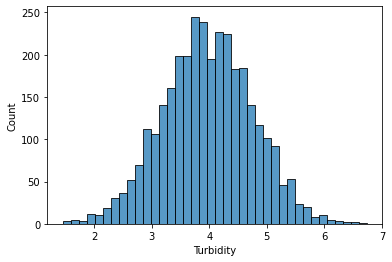

In [31]:
sns.histplot( data=wp, x='Turbidity')

# Dealing with the missing values 

In [89]:
 #wp.isna().any()
 wp.columns[wp.isnull().any()].tolist()
    

['ph', 'Sulfate', 'Trihalomethanes']

In [4]:
#print(wp['ph'].isnull())
pd.isnull(wp['ph']) # checking null value of ph column
x = wp.ph.isnull().sum() # getting the count of number of null values in ph column
y = wp.Sulfate.isnull().sum() # getting the count of number of null values in sulfate column
z = wp.Trihalomethanes.isnull().sum() # getting the count of number of Trihalomethanes  values in sulfate column
nullcount = [x,y,z]
print(nullcount)

[491, 781, 162]


In [90]:
mean_ph = wp['ph'].mean() # getting the mean ph values for ph column
mean_Sulfate = wp['Sulfate'].mean() # getting the mean ph values for ph column
mean_Trihalomethanes = wp['Trihalomethanes'].mean() # getting the mean ph values for ph column
lstmean = [mean_ph,mean_Sulfate,mean_Trihalomethanes]
print(lstmean)
wp['ph'].fillna(value=mean_ph, inplace=True) # updating missing values of ph column with mean ph value
wp['Sulfate'].fillna(value=mean_Sulfate, inplace=True) # updating missing values of Sulfate column with mean Sulfate value
wp['Trihalomethanes'].fillna(value=mean_Trihalomethanes, inplace=True) # updating missing values of Trihalomethanes column with mean Trihalomethanes value
X = wp
y = wp.Potability

[7.080794504276819, 333.7757766108134, 66.39629294676803]


# Splitting the training and testing set

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2194, 10)
(2194,)
(1082, 10)
(1082,)


# Applying Logistic Regression

In [92]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [113]:
clf = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000, random_state=0).fit(X_train,Y_train)
clf.predict(X_train[:10])
clf.score(X_test, Y_test)

1.0

# Applying Support Vector Machine

In [120]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

1.0